(72, 7130)
(72, 7129)
(72, 7129)
   Label  AFFX-BioB-5_at  AFFX-BioB-M_at  AFFX-BioB-3_at  AFFX-BioC-5_at  \
0    0.0          -214.0          -153.0           -58.0            88.0   
1    1.0          -139.0           -73.0            -1.0           283.0   
2    1.0           -76.0           -49.0          -307.0           309.0   
3    0.0          -135.0          -114.0           265.0            12.0   
4    0.0          -106.0          -125.0           -76.0           168.0   

   AFFX-BioC-3_at  AFFX-BioDn-5_at  AFFX-BioDn-3_at  AFFX-CreX-5_at  \
0          -295.0           -558.0            199.0          -176.0   
1          -264.0           -400.0           -330.0          -168.0   
2          -376.0           -650.0             33.0          -367.0   
3          -419.0           -585.0            158.0          -253.0   
4          -230.0           -284.0              4.0          -122.0   

   AFFX-CreX-3_at  ...  U48730_at  U58516_at  U73738_at  X06956_at  X16699_at  \
0 

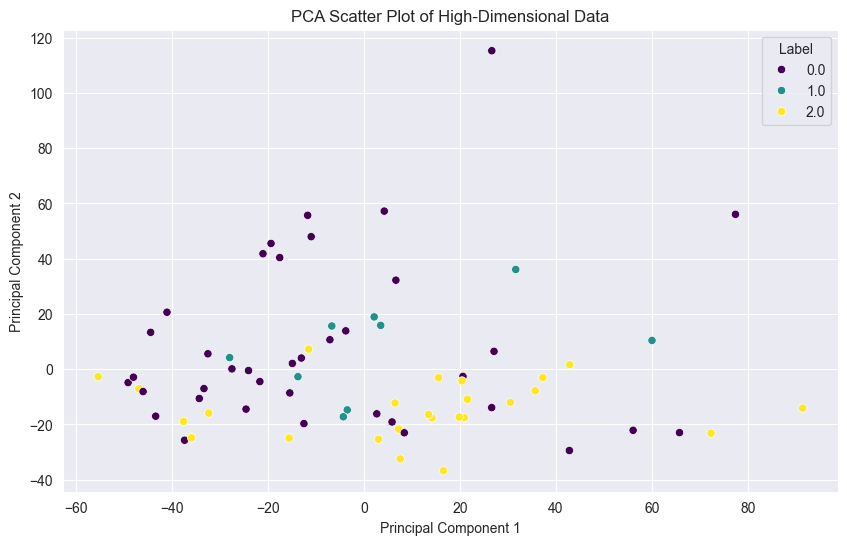

KMeans(cluster=12) Silhouette Score: 0.039
KMeans(cluster=12) Adjusted Rand Score: 0.085
KMeans(cluster=5) Silhouette Score: 0.069
KMeans(cluster=5) Adjusted Rand Score: 0.183
KMeans(cluster=2) Silhouette Score: 0.107
KMeans(cluster=2) Adjusted Rand Score: 0.161
DBSCAN(min_samples=15) Silhouette Score: Not applicable
DBSCAN(min_samples=15) Adjusted Rand Score: 0.000
DBSCAN(min_samples=10) Silhouette Score: Not applicable
DBSCAN(min_samples=10) Adjusted Rand Score: 0.000
DBSCAN(min_samples=5) Silhouette Score: Not applicable
DBSCAN(min_samples=5) Adjusted Rand Score: 0.000
层次聚类(default) Silhouette Score: 0.080
层次聚类(default) Adjusted Rand Score: 0.177
AP(default) Silhouette Score: 0.046
AP(default) Adjusted Rand Score: 0.073


In [1]:
# 导入相关数据库

import pandas as pd
import numpy as np
from sklearn.model_selection import RepeatedStratifiedKFold, cross_val_score
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score,adjusted_rand_score
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering, AffinityPropagation
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import seaborn as sns

# 读取文件

data=pd.read_csv('E:\code\githubuse\\utils-py\class-machine_learning\experiment_3\data\LeukemiaDataSet3.dat',header=None,sep='\s+')
labels1 = data.iloc[:, 0].values
features = data.iloc[:, 1:].values
print(data.shape)
print(features.shape)
leukemia_names = pd.read_excel('E:\code\githubuse\\utils-py\class-machine_learning\experiment_3\data\leukemia_names.xls', header=None)
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# 不划分训练集和测试集, 直接使用所有数据进行聚类
# X_train, X_test, y_train, y_test = train_test_split(features_scaled, labels, test_size=0.2, random_state=42)

print(features_scaled.shape)
leukemia_names = leukemia_names.iloc[1:, 1].values.tolist()
data.columns = ['Label'] + leukemia_names
print(data.head())

# 进行数据可视化
# 维度太多，先降维
# 应用PCA降维到2D

pca = PCA(n_components=2)
principal_components = pca.fit_transform(features_scaled)

# 将主成分转换为DataFrame

pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])

# 添加标签

pca_df['Label'] = labels1

# 绘制散点图

plt.figure(figsize=(10, 6))
sns.scatterplot(x='PC1', y='PC2', hue='Label', data=pca_df, palette='viridis')
plt.title('PCA Scatter Plot of High-Dimensional Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

#构建模型

def evaluate_model(X, y, model):
    cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
    return scores

# 模型测试

def get_models():
    models, names = list(),list()
    
    # KMeans聚类

    models.append(KMeans(n_clusters=12, random_state=42))
    names.append('KMeans(cluster=12)')
    models.append(KMeans(n_clusters=5, random_state=42))
    names.append('KMeans(cluster=5)')
    models.append(KMeans(n_clusters=2, random_state=42))
    names.append('KMeans(cluster=2)')

    # DBSCAN

    models.append(DBSCAN(eps=0.01, min_samples=15))
    names.append('DBSCAN(min_samples=15)')
    models.append(DBSCAN(eps=0.04, min_samples=10))
    names.append('DBSCAN(min_samples=10)')
    models.append(DBSCAN(eps=0.2, min_samples=5))
    names.append('DBSCAN(min_samples=5)')
    
    # 层次聚类

    models.append(AgglomerativeClustering())
    names.append('层次聚类(default)')
    
    # AP聚类

    models.append(AffinityPropagation())
    names.append('AP(default)')
    return models  , names

results = {}
models, names = get_models()

for model, name in zip(models, names):
    labels = model.fit_predict(features_scaled)

    # 检查聚类结果是否有多个类别
    
    unique_labels = np.unique(labels)
    if len(unique_labels)> 1:
        score = silhouette_score(features_scaled, labels)
    else:
        score = None

    score2 = adjusted_rand_score(labels1, labels)
    results[name] = {
        'labels': labels,
        'silhouette_score': score,
        'adjusted_rand_score': score2
    }
    print(f"{name} Silhouette Score: {score:.3f}" if score is not None else f"{name} Silhouette Score: Not applicable")
    print(f"{name} Adjusted Rand Score: {score2:.3f}")